# 🏁 Módulo 4 – Preguntas de Negocio

**Objetivo del módulo**  
Aplicar todo lo aprendido (limpieza, EDA, visualización, agrupaciones) para **responder preguntas de negocio reales** con Python y Pandas.

**¿Por qué es importante?**  
Un analista de datos no solo organiza tablas: transforma datos en **insights accionables** que guían decisiones de producto, marketing o estrategia. Saber plantear y contestar preguntas concretas demuestra el valor práctico de tus habilidades técnicas.

---

En este notebook resolverás **20 preguntas** usando el dataset limpio `salarios_pais.csv`.  
Cada pregunta viene acompañada de una celda *Markdown* (enunciado) y su celda de código con la solución.



---
## 0 · Setup
Cargamos librerías y configuramos Seaborn para que los gráficos se vean con un estilo agradable.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


In [2]:
# Preparar los imports y acceso al módulo utils
import sys

# Definir raíz del proyecto
ROOT = Path.cwd().resolve().parent
sys.path.append(str(ROOT))

# Importar ruta
from utils.paths import DATA_PROCESSED_DIR

# Definir un path o ruta con Path
path_salarios_pais = DATA_PROCESSED_DIR / "salarios_pais.csv"
path_salarios_pais = str(path_salarios_pais)

print(f"Ruta del archivo salarios_pais: {path_salarios_pais}")
print(f"existe archivo salarios_pais: {Path(path_salarios_pais).exists()}")

df_salarios_pais = pd.read_csv(filepath_or_buffer=path_salarios_pais, sep=',', encoding='utf-8')
df_salarios_pais.head()

Ruta del archivo salarios_pais: C:\Users\Leyda\pydatapanama-cursos\cursos\analisis_datos\data\processed\salarios_pais.csv
existe archivo salarios_pais: True


,nombre,apellido,edad,pais,educacion_universitaria,nombre_de_la_empresa,cargo,anos_en_la_empresa,sueldo_anual_dolares,bono_anual_euros,bono_anual_dolares,capital,cantidad_de_habitantes,PIB,ingreso_per_capita,compensacion_total,senioridad
0,José,López,36,Chile,Sí,Mercado Libre,Python Developer,2,71841.0,4981.0,5479.1,Santiago,19116209.0,3.170000e+11,16580.0,77320.1,Junior
1,Fernanda,Vargas,39,Chile,Sí,Amazon,AI Software Engineer,2,142115.0,1252.0,1377.2,Santiago,19116209.0,3.170000e+11,16580.0,143492.2,Junior
2,Fernanda,Ramírez,30,Colombia,No,Facebook,Machine Learning Engineer,2,92278.0,5262.0,5788.2,Bogotá,51874024.0,3.430000e+11,6611.0,98066.2,Junior
3,José,Gómez,35,Chile,Sí,Mercado Libre,Python Developer,12,97130.0,3671.0,4038.1,Santiago,19116209.0,3.170000e+11,16580.0,101168.1,Senior
4,Ana,Pérez,32,Panamá,No,Amazon,Project Manager,2,61413.0,10190.0,11209.0,Ciudad de Panamá,4468000.0,7.600000e+10,16995.0,72622.0,Junior


## 1️⃣ Pregunta  
**¿Cuál es la compensación total promedio en el dataset?**

### ¿Por qué importa?  
La media salarial brinda una referencia rápida para entender el nivel general de pago en la organización o sector. Permite comparar con benchmarks externos y detectar si la empresa está ofreciendo compensaciones competitivas.

### Pista  
La respuesta está a un solo método de distancia sobre la columna `compensacion_total`.

In [43]:
# Calcula la compensación total promedio
promedio_total = df_salarios_pais['compensacion_total'].mean()
print(f'Compensación total promedio: {promedio_total:.2f}')

Compensación total promedio: 94583.37


## 2️⃣ Pregunta  
**¿Quiénes son los 5 empleados con la compensación total más alta?**

### ¿Por qué importa?  
Identificar a los empleados mejor pagados ayuda a:  
- Detectar roles o perfiles críticos con alto valor de mercado.  
- Verificar consistencia salarial interna y posibles brechas injustificadas.  
- Analizar si los niveles de compensación se alinean con la estrategia de retención de talento.

### Pista   
Ordena la columna `compensacion_total` de forma descendente y toma solo las primeras 5 filas.

In [4]:
# Top 5 empleados con mayor compensación total
cp_top5 = df_salarios_pais.nlargest(5, 'compensacion_total')
cp_top5[['nombre', 'apellido', 'cargo', 'pais', 'compensacion_total']]


,nombre,apellido,cargo,pais,compensacion_total
94,Luis,Rodríguez,AI Software Engineer,Colombia,167806.7
162,Ana,Morales,AI Software Engineer,México,165880.7
7,Pedro,Herrera,AI Software Engineer,México,164982.1
143,Luis,Herrera,AI Software Engineer,Costa Rica,163275.9
86,Lucía,Flores,AI Software Engineer,Argentina,162450.4


## 3️⃣ Pregunta  
**¿Qué país registra la compensación total promedio más alta?**

### ¿Por qué importa?  
Conocer el país donde los salarios son más altos permite:  
- Evaluar mercados laborales competitivos y su impacto en costes de contratación.  
- Diseñar políticas de compensación diferenciadas por región.  
- Detectar posibles desalineamientos con el costo de vida o la estrategia global de la empresa.

### Pista  
Agrupa por `pais`, calcula el promedio de `compensacion_total` y ordena de mayor a menor.

In [42]:
# País con la compensación promedio más alta
comp_pais = df_salarios_pais.groupby('pais')['compensacion_total'].mean().sort_values(ascending=False)
top_pais = comp_pais.head(1)
print(f'País con la compensación total más alta: {top_pais.round(2)}')


País con la compensación total más alta: pais
Colombia    98578.35
Name: compensacion_total, dtype: float64


## 4️⃣ Pregunta  
**¿Cómo se distribuye la compensación total según el nivel de senioridad?**  
*(Visualiza la comparación con un boxplot).*

### ¿Por qué importa?  
- Revela si existen diferencias salariales significativas entre Juniors y Seniors.  
- Permite detectar outliers (pagos extremadamente altos o bajos) por nivel.  
- Ayuda a planificar escalas de compensación equitativas y competitivas.

### Pista  
Usa `sns.boxplot()` con `x='senioridad'` y `y='compensacion_total'`.

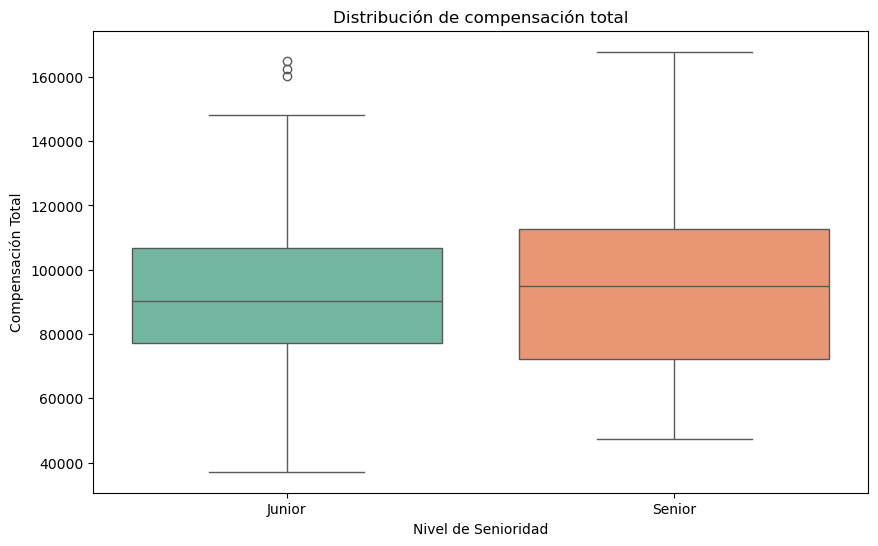

In [13]:
# Boxplot de compensación total por nivel de senioridad
plt.figure(figsize=(10,6))
sns.boxplot(x='senioridad', 
            y='compensacion_total',
            hue='senioridad',
            palette='Set2', 
            data=df_salarios_pais,
            legend=False)
plt.title('Distribución de compensación total')
plt.xlabel('Nivel de Senioridad')
plt.ylabel('Compensación Total')
plt.show()

## 5️⃣ Pregunta  
**¿Existe correlación entre los años en la empresa y la compensación total?**

### ¿Por qué importa?  
- Permite evaluar si la antigüedad impacta directamente en el salario.  
- Ayuda a validar políticas de incremento por permanencia.  
- Detectar una baja correlación podría indicar que la compensación está más ligada a desempeño o rol que a tiempo en la organización.

### Pista  
Calcula el coeficiente de correlación de Pearson entre `anos_en_la_empresa` y `compensacion_total`.

In [38]:
# Correlación entre antigüedad y compensación total
correlacion = df_salarios_pais['anos_en_la_empresa'].corr(df_salarios_pais['compensacion_total'])
print(f'Correlación entre antigüedad y compensación total: {correlacion:.3f}')

Correlación entre antigüedad y compensación total: 0.017


## 6️⃣ Pregunta  
**¿Qué cargo presenta la mediana de compensación total más alta?**

### ¿Por qué importa?  
- La mediana es robusta frente a outliers; refleja el salario “típico” para cada rol.  
- Ayuda a identificar posiciones clave con mayor valor de mercado o responsabilidad.  
- Informa decisiones de contratación y alineación salarial interna.

### Pista  
Agrupa por `cargo`, calcula la **mediana** de `compensacion_total`, ordena en orden descendente y observa el primer resultado.

In [18]:
# Cargo con la mediana de compensación total más alta
cargo_med = df_salarios_pais.groupby('cargo')['compensacion_total'].median().sort_values(ascending=False)
top_cargo = cargo_med.head(1)
print(f'Cargo con la mediana de compensación total más alta: {top_cargo}')

Cargo con la mediana de compensación total más alta: cargo
AI Software Engineer    130957.7
Name: compensacion_total, dtype: float64


## 7️⃣ Pregunta  
**¿Cómo es la distribución de los bonos anuales en dólares?**  
*(Construye un histograma e incluye la curva KDE para visualizar la densidad).*

### ¿Por qué importa?  
- Ayuda a ver si los bonos están concentrados en un rango específico o tienen una cola larga.  
- Detecta outliers que podrían distorsionar el promedio.  
- Facilita comparar políticas de incentivos entre departamentos o países.

### Pista  
Usa `sns.histplot()` sobre la columna `bono_anual_dolares`, pon `bins=30` y `kde=True`.

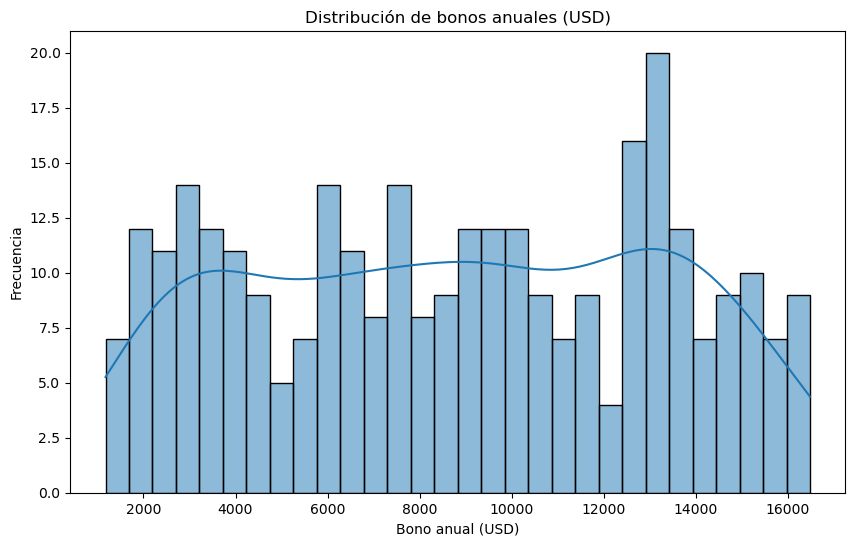

In [ ]:
# Histograma y KDE de los bonos anuales en USD
plt.figure(figsize=(10,6))
sns.histplot(data=df_salarios_pais, 
             x='bono_anual_dolares',
             bins=30,
             kde=True)
plt.title('Distribución de bonos anuales (USD)')
plt.xlabel('Bono anual (USD)')
plt.ylabel('Frecuencia')
plt.show()


## 8️⃣ Pregunta  
**¿Qué proporción de empleados proviene de cada país?**  
*(Visualiza el resultado en un barplot).*

### ¿Por qué importa?  
- Mide la **representatividad geográfica** de la fuerza laboral.  
- Ayuda a detectar concentración en un país y oportunidades de diversificación.  
- Sirve como referencia para ajustar políticas de compensación y beneficio regional.

### Pista  
Calcula `value_counts(normalize=True)` sobre la columna `pais`, multiplícalo por 100 para obtener porcentajes y grafícalo con `plot(kind='bar')`.

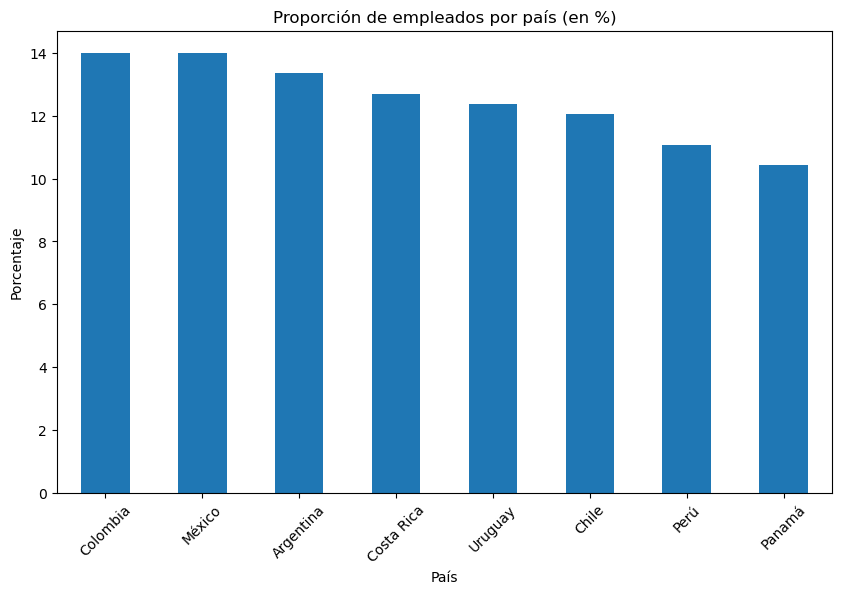

In [25]:
# Proporción de empleados por país (en %)

# Calculo de proporciones por país
proporcion_pais = df_salarios_pais['pais'].value_counts(normalize=True) * 100

# Gráfico de barras
proporcion_pais.plot(kind='bar', figsize=(10, 6))
plt.title('Proporción de empleados por país (en %)')
plt.xlabel('País')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.show()

## 9️⃣ Pregunta  
**¿Cuál es el bono anual máximo registrado para cada cargo?**

### ¿Por qué importa?  
- Revela el techo de incentivos para cada rol.  
- Permite verificar si ciertos cargos reciben bonos excepcionalmente altos (posibles outliers o políticas de bonificación agresivas).  
- Ayuda a diseñar esquemas de reconocimiento competitivos y equitativos.

### Pista  
Agrupa por `cargo`, aplica `max()` a `bono_anual_dolares` y ordena el resultado de mayor a menor.

In [22]:
# Bono anual máximo por cargo
bono_max_cargo = df_salarios_pais.groupby('cargo')['bono_anual_dolares'].max().sort_values(ascending=False)
print(f'Bono anual máximo por cargo: {bono_max_cargo}')

Bono anual máximo por cargo: cargo
Python Developer             16476.9
Data Engineer                16457.1
Data Scientist               16406.5
AI Software Engineer         16150.2
Project Manager              16079.8
Software Engineer            16039.1
Data Analyst                 15991.8
Product Owner                15796.0
Machine Learning Engineer    14022.8
Name: bono_anual_dolares, dtype: float64


## 🔟 Pregunta  
**¿Cuáles son los 3 países con más empleados que ocupan el cargo de *Data Scientist*?**

### ¿Por qué importa?  
- Indica dónde se concentra el talento de ciencia de datos en la organización.  
- Ayuda a orientar iniciativas de reclutamiento, formación y comunidades locales.  
- Puede revelar hubs de innovación o brechas regionales en ese perfil tan demandado.

### Pista  
Filtra el DataFrame por `cargo == "Data Scientist"` y aplica `value_counts()` sobre la columna `pais`, luego utiliza `.head(3)`.

In [23]:
# Top 3 países con más Data Scientists
paises_ds = df_salarios_pais[df_salarios_pais['cargo'] == 'Data Scientist']['pais'].value_counts()
top_paises_ds = paises_ds.head(3)
print(f'Top 3 países con más Data Scientists: {top_paises_ds}')


Top 3 países con más Data Scientists: pais
Perú         7
Uruguay      6
Argentina    6
Name: count, dtype: int64


## 1️⃣1️⃣ Pregunta  
**¿Cómo se relacionan entre sí las variables numéricas del dataset?**  
*(Construye una matriz de correlación y preséntala en un heatmap).*

### ¿Por qué importa?  
- Detecta **relaciones lineales fuertes** (positivas o negativas) entre variables.  
- Ayuda a identificar **multicolinealidad** antes de crear modelos predictivos.  
- Destaca patrones inesperados que merecen análisis más profundo.

### Pista  
Selecciona solo las columnas numéricas (`select_dtypes('number')`), calcula `corr()` y grafica con `sns.heatmap(annot=True, cmap='coolwarm')`.

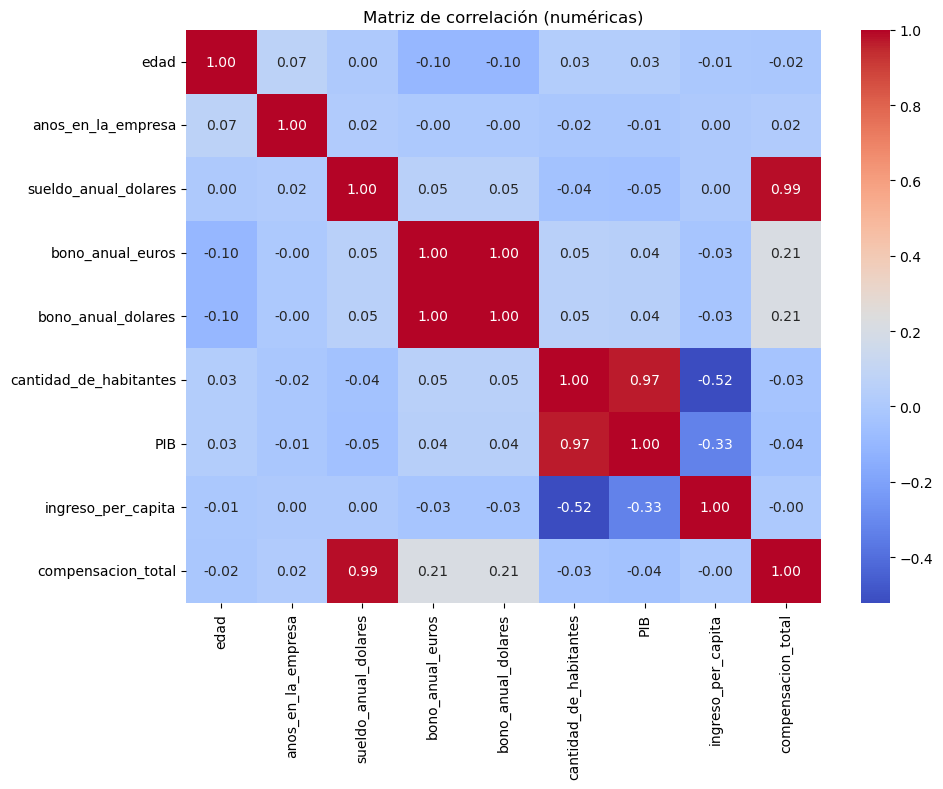

In [26]:
# Matriz de correlación numérica con heatmap

# Selección de columnas numéricas
num_cols = df_salarios_pais.select_dtypes(include='number')

# Calculo de matriz de correlación
matriz_corr = num_cols.corr()

# Gráfico de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr,
            annot=True,
            cmap='coolwarm',
            fmt='.2f')
plt.title('Matriz de correlación (numéricas)')
plt.tight_layout()
plt.show()

## 1️⃣2️⃣ Pregunta  
**¿Qué porcentaje de empleados del dataset tiene educación universitaria?**

### ¿Por qué importa?**  
- Mide el nivel de formación académica dentro de la organización.  
- Sirve de referencia para programas de capacitación, becas y desarrollo profesional.  
- Permite contrastar la brecha (si existe) entre compensación y formación.

### Pista
Usa `value_counts(normalize=True)` en la columna `educacion_universitaria`, luego multiplica por 100 para obtener el porcentaje.

In [37]:
# Porcentaje de empleados con y sin educación universitaria
porcentaje_uni = df_salarios_pais['educacion_universitaria'].value_counts(normalize=True) * 100
print(f'Porcentaje de empleados con y sin educación universitaria: \n{porcentaje_uni.round(2)}')

Porcentaje de empleados con y sin educación universitaria: 
educacion_universitaria
Sí    51.79
No    48.21
Name: proportion, dtype: float64


## 1️⃣3️⃣ Pregunta  
**¿Cuál es la compensación total promedio por país y nivel de senioridad?**  
*(Presenta la respuesta en una tabla pivote).*

### ¿Por qué importa?  
- Permite comparar si la diferencia salarial entre Juniors y Seniors es coherente en todos los países.  
- Identifica países donde los Seniors se pagan por encima o por debajo de la media global.  
- Ayuda a diseñar políticas de compensación regionales y ajustar los planes de carrera.

### Pista  
Crea una tabla pivote con `index='pais'`, `columns='senioridad'` y `values='compensacion_total'`, usando `aggfunc='mean'`.

In [31]:
# Tabla pivote: compensación promedio por país y senioridad
tabla_pivote = df_salarios_pais.pivot_table(index='pais',
                                            columns='senioridad',
                                            values='compensacion_total',
                                            aggfunc='mean')                                            
tabla_pivote = tabla_pivote.round(3)
tabla_pivote

senioridad,Junior,Senior
pais,,
Argentina,89211.747,96921.355
Chile,97065.144,98729.214
Colombia,96912.623,100323.395
Costa Rica,103058.793,86087.171
México,86462.661,94921.744
Panamá,90936.825,94432.906
Perú,92564.367,93887.389
Uruguay,91380.053,99751.687


## 1️⃣4️⃣ Pregunta  
**¿Qué relación existe entre el salario anual y el bono anual?**  
*(Visualízalo en un scatterplot).*

### ¿Por qué importa?  
- Permite ver si los bonos son proporcionales al salario base o se otorgan de forma independiente.  
- Ayuda a detectar empleados con bonos atípicamente altos respecto a su sueldo.  
- Informa sobre la política de incentivos y su coherencia interna.

### Pista  
Usa `sns.scatterplot()` con `x='sueldo_anual_dolares'` y `y='bono_anual_dolares'`.

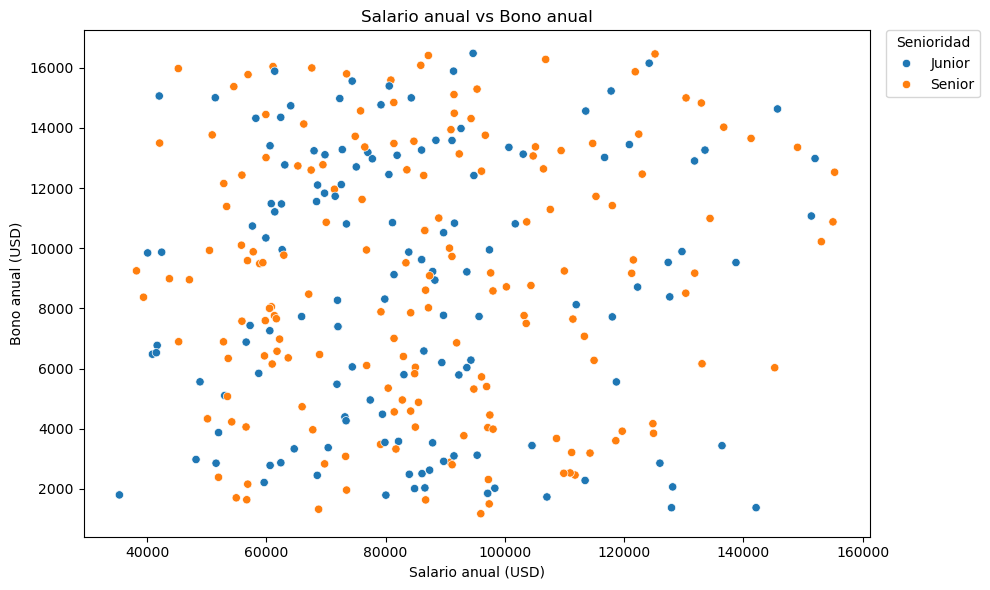

In [32]:
# Dispersión salario anual vs bono anual
plt.figure(figsize=(10,6))
ax = sns.scatterplot(data=df_salarios_pais,
                     x='sueldo_anual_dolares',
                     y='bono_anual_dolares',
                     hue='senioridad')
plt.title('Salario anual vs Bono anual')
plt.xlabel('Salario anual (USD)')
plt.ylabel('Bono anual (USD)')

plt.legend(title='Senioridad',
           bbox_to_anchor=(1.02, 1),
           loc='upper left',
           borderaxespad=0)

plt.tight_layout()
plt.show()

## 1️⃣5️⃣ Pregunta  
**¿Qué porcentaje de empleados lleva más de 5 años en la empresa?**

### ¿Por qué importa?  
- Mide la **retención de talento** y la estabilidad de la plantilla.  
- Un porcentaje alto indica lealtad y experiencia acumulada; uno bajo puede señalar rotación elevada.  
- Informa iniciativas de engagement y programas de reconocimiento para empleados veteranos.

### Pista  
Aplica una condición `df['anos_en_la_empresa'] > 5`, usa `.mean()` para obtener la proporción y multiplícalo por 100.

In [34]:
# Porcentaje de empleados con más de 5 años en la empresa
porcentaje_senior = (df_salarios_pais['anos_en_la_empresa'] > 5).mean() * 100
print(f'Porcentaje de empleados con más de 5 años en la empresa: {porcentaje_senior:.2f}%')

Porcentaje de empleados con más de 5 años en la empresa: 55.70%


## 1️⃣6️⃣ Pregunta  
**¿Qué país presenta el bono anual promedio más alto?**

### ¿Por qué importa?  
- Indica dónde la empresa invierte más en incentivos variables.  
- Ayuda a evaluar la competitividad de los planes de bonificación por región.  
- Puede revelar disparidades que requieran revisión de políticas de compensación.

### Pista  
Agrupa por `pais`, calcula la media de `bono_anual_dolares` y ordena de mayor a menor.

In [46]:
# País con el bono anual promedio más alto
bono_pro_pais = df_salarios_pais.groupby('pais')['bono_anual_dolares'].mean().sort_values(ascending=False)
top_bono_pais = bono_pro_pais.head(1)
print(f'País con el bono anual promedio más alto: {top_bono_pais.round(2)}')

País con el bono anual promedio más alto: pais
México    9359.85
Name: bono_anual_dolares, dtype: float64


## 1️⃣7️⃣ Pregunta  
**¿Cómo varía la distribución de la compensación total entre países?**  
*(Muestra un boxplot por país para comparar rangos y outliers).*

### ¿Por qué importa?  
- Visualiza diferencias salariales entre mercados.  
- Ayuda a identificar países con mayor dispersión o presencia de outliers altos/bajos.  
- Facilita decisiones sobre ajustes regionales y equidad interna.

### Pista  
Emplea `sns.boxplot()` con `x='pais'` y `y='compensacion_total'`; rota las etiquetas para que no se solapen.

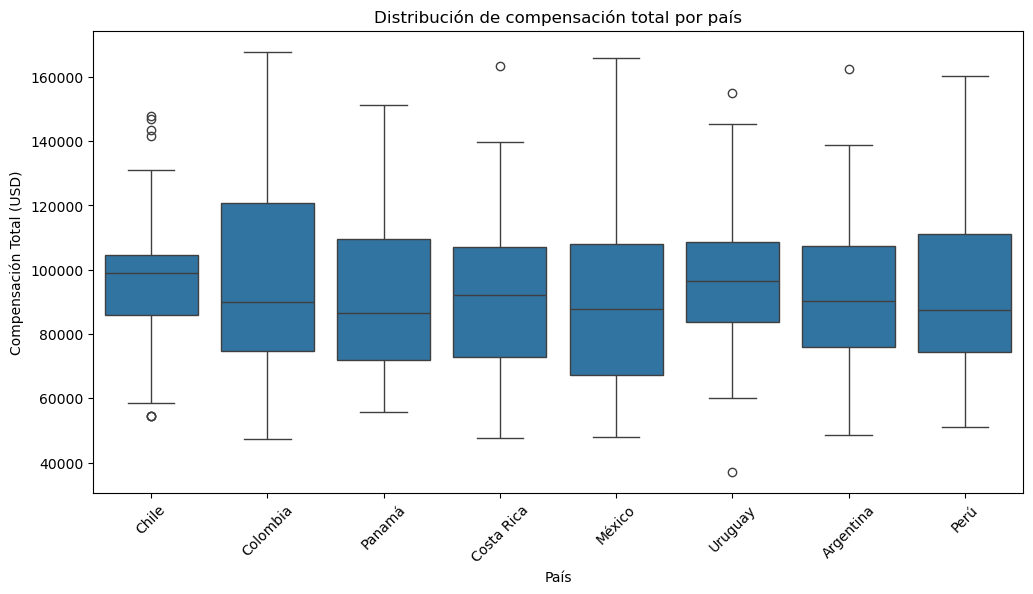

In [48]:
# Boxplot de compensación total por país
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_salarios_pais,
            x='pais',
            y='compensacion_total')
plt.xticks(rotation=45)
plt.title('Distribución de compensación total por país')
plt.xlabel('País')
plt.ylabel('Compensación Total (USD)')
plt.show()

## 1️⃣8️⃣ Pregunta  
**¿Cuál es el promedio de años en la empresa para cada cargo?**

### ¿Por qué importa?  
- Indica qué roles retienen talento por más tiempo.  
- Ayuda a identificar posiciones con alta rotación que podrían requerir planes de carrera o incentivos adicionales.  
- Ofrece información para comparar madurez y profundidad de experiencia entre áreas.

### Pista  
Agrupa por `cargo`, aplica `mean()` sobre `anos_en_la_empresa` y ordena descendente para ver los cargos con mayor antigüedad media.

In [49]:
# Promedio de años en la empresa por cargo
prom_anos_cargo = df_salarios_pais.groupby('cargo')['anos_en_la_empresa'].mean().sort_values(ascending=False)
print(f'Promedio de años en la empresa por cargo: {prom_anos_cargo.round(2)}')


Promedio de años en la empresa por cargo: cargo
Product Owner                7.79
Data Scientist               7.00
Python Developer             6.67
Data Analyst                 6.62
AI Software Engineer         6.52
Machine Learning Engineer    6.50
Data Engineer                6.50
Software Engineer            5.18
Project Manager              5.16
Name: anos_en_la_empresa, dtype: float64


## 1️⃣9️⃣ Pregunta  
**¿Cuál es la mediana del ingreso per cápita entre los países presentes en el dataset?**

### ¿Por qué importa?  
- Brinda un punto de referencia de **poder adquisitivo** promedio para las regiones donde opera la empresa.  
- Facilita comparar la compensación interna con los niveles de ingreso del país, aportando contexto sobre competitividad salarial local.  
- La mediana es robusta frente a valores extremos y refleja mejor el ingreso “típico” que el promedio en economías dispares.

### Pista  
Basta con aplicar `.median()` a la columna `ingreso_per_capita`.

In [50]:
df_salarios_pais.columns

Index(['nombre', 'apellido', 'edad', 'pais', 'educacion_universitaria',
       'nombre_de_la_empresa', 'cargo', 'anos_en_la_empresa',
       'sueldo_anual_dolares', 'bono_anual_euros', 'bono_anual_dolares',
       'capital', 'cantidad_de_habitantes', 'PIB', 'ingreso_per_capita',
       'compensacion_total', 'senioridad'],
      dtype='object')

In [53]:
# Mediana del ingreso per cápita de los países
ingreso_med = df_salarios_pais.groupby('pais')['ingreso_per_capita'].median().sort_values(ascending=False)
print(f'Mediana del ingreso per cápita de los países: {ingreso_med}')

Mediana del ingreso per cápita de los países: pais
Uruguay       20300.0
Panamá        16995.0
Chile         16580.0
Costa Rica    14319.0
Argentina     14120.0
México        11190.0
Perú           7900.0
Colombia       6611.0
Name: ingreso_per_capita, dtype: float64


## 2️⃣0️⃣ Pregunta  
**¿Cómo se distribuyen los bonos anuales (USD) según el nivel de senioridad?**  
*(Representa la comparación con un violinplot).*

### ¿Por qué importa?  
- Muestra no solo la mediana y el rango, sino la **densidad completa** de los bonos para Juniors y Seniors.  
- Facilita detectar si los rangos de bonos se solapan o si los Seniors reciben incentivos notablemente mayores.  
- Ayuda a evaluar la equidad y efectividad del esquema de bonificación por experiencia.

### Pista  
Usa `sns.violinplot()` con `x='senioridad'` y `y='bono_anual_dolares'`.

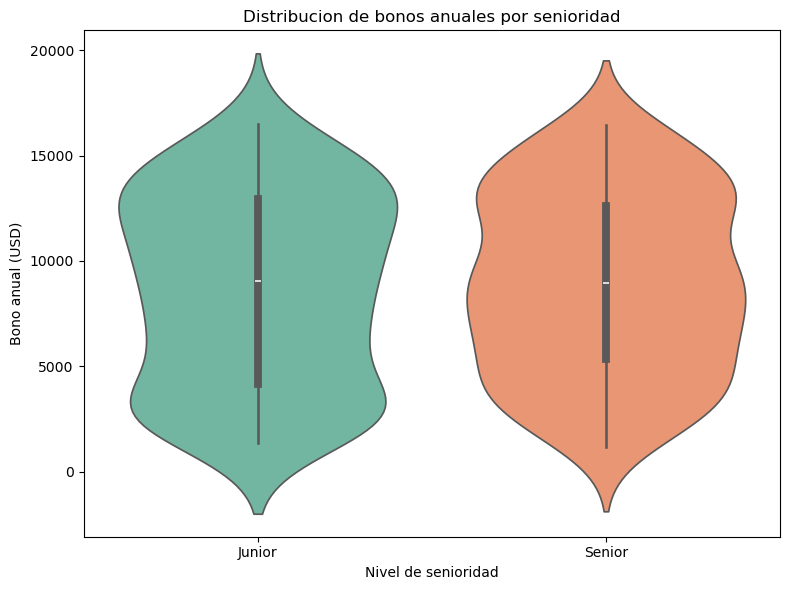

In [57]:
# Violinplot de bonos anuales por senioridad
plt.figure(figsize=(8,6))
sns.violinplot(data=df_salarios_pais,
               x='senioridad',
               y='bono_anual_dolares',
               hue='senioridad',
               palette='Set2',
               legend=False)
plt.title('Distribucion de bonos anuales por senioridad')
plt.xlabel('Nivel de senioridad')
plt.ylabel('Bono anual (USD)')
plt.tight_layout()
plt.show()


## 🎉 ¡Felicidades!

Has completado el proyecto integral de **Análisis de Datos con Python**.  
Pasaste por todo el ciclo:

1. **Preparar el entorno**  
2. **Limpiar y transformar datos**  
3. **Explorar con visualizaciones**  
4. **Responder preguntas de negocio reales**

Cada notebook, gráfico y métrica que generaste demuestra tu capacidad para convertir datos en información valiosa. ¡Sigue practicando, comparte tus hallazgos con la comunidad PyData Panamá y recuerda que el siguiente insight puede cambiar una decisión clave!

🚀 **Buen trabajo, Data Analyst**. 